# Setup

In [1]:
# enable to reimport modules
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from tqdm import tqdm

pd.options.display.max_columns = 999

In [3]:
warnings.filterwarnings('ignore')

# Read Data File

In [7]:
train_i = pd.read_csv('../data/train_identity.csv', index_col='TransactionID')
train_t = pd.read_csv('../data/train_transaction.csv', index_col='TransactionID')
test_i = pd.read_csv('../data/test_identity.csv', index_col='TransactionID')
test_t = pd.read_csv('../data/test_transaction.csv', index_col='TransactionID')
# submission = pd.read_csv('../data/sample_submission.csv')

In [14]:
train = train_t.join(train_i)
test = test_t.join(test_i)
del train_i, train_t, test_i, test_t

In [16]:
train.shape

(590540, 433)

In [17]:
test.shape

(506691, 432)

In [15]:
train.head(3)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

In [176]:
train.select_dtypes('int').shape

(590540, 3)

In [179]:
test.select_dtypes('int').shape

(506691, 2)

In [180]:
train.select_dtypes('float').shape

(590540, 399)

In [181]:
test.select_dtypes('float').shape

(506691, 399)

In [182]:
train.select_dtypes('object').shape

(590540, 31)

In [184]:
test.select_dtypes('object').shape

(506691, 31)

# Numerical Plot

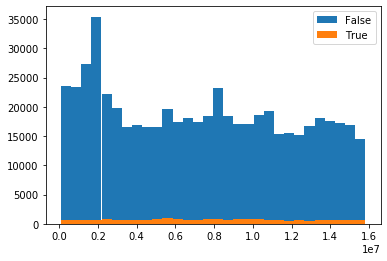

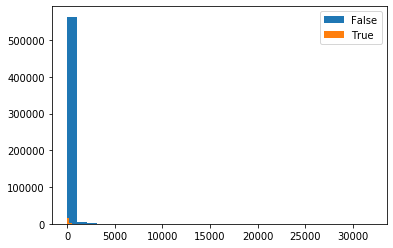

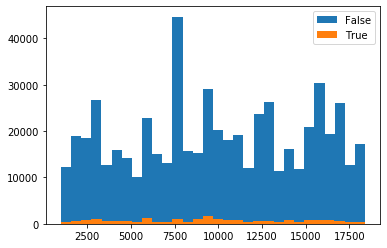

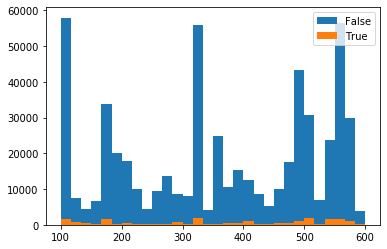

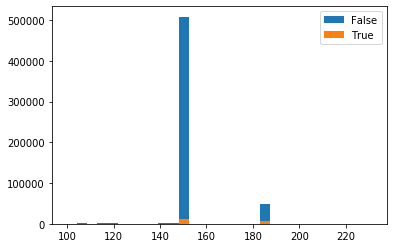

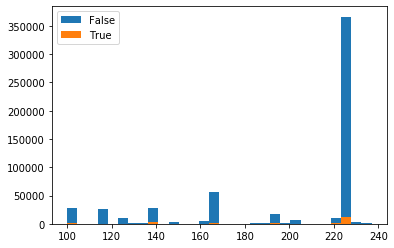

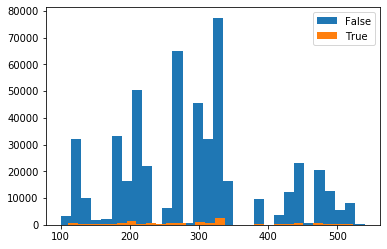

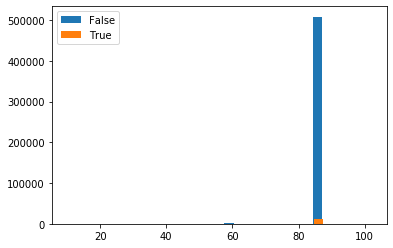

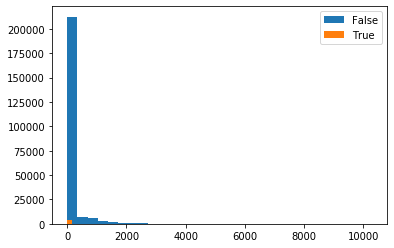

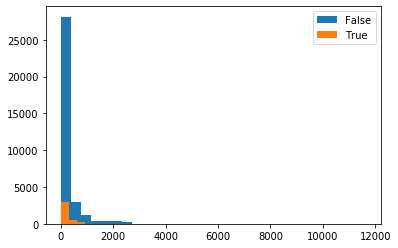

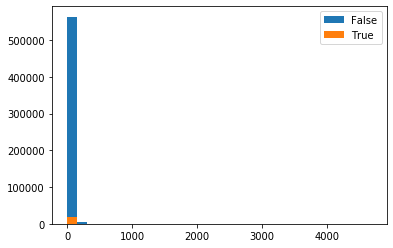

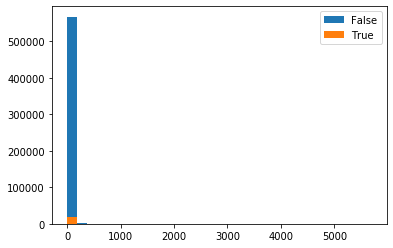

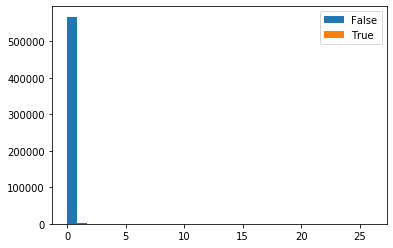

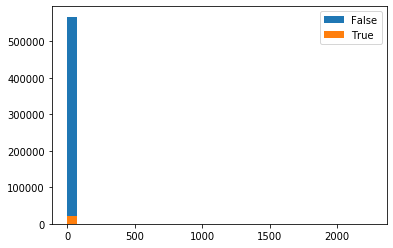

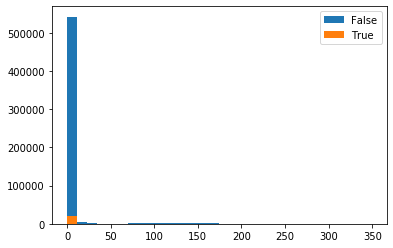

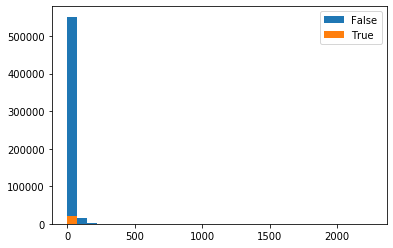

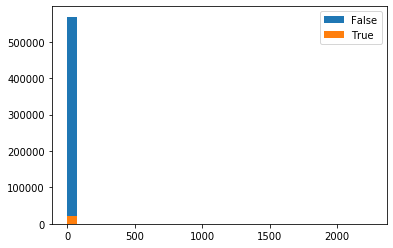

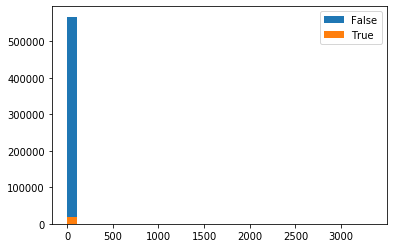

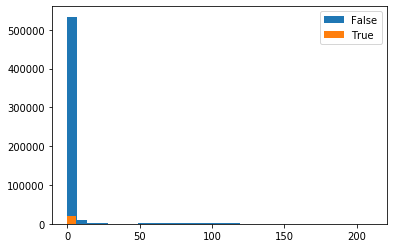

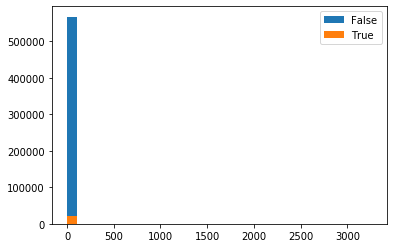

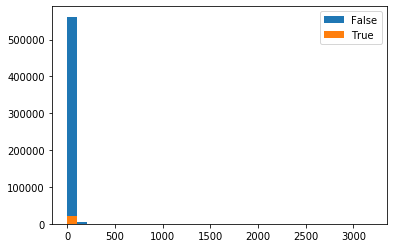

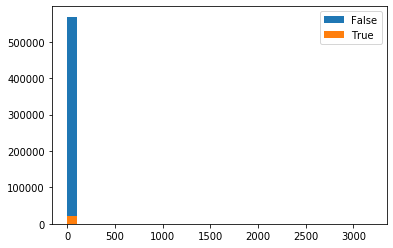

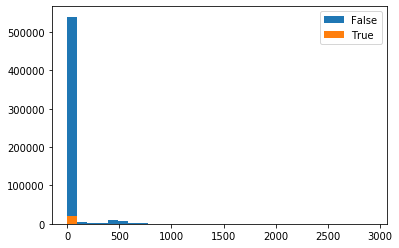

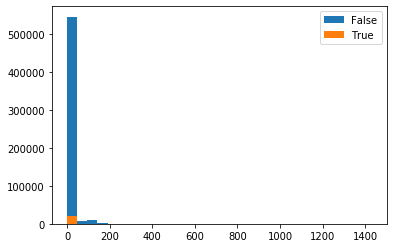

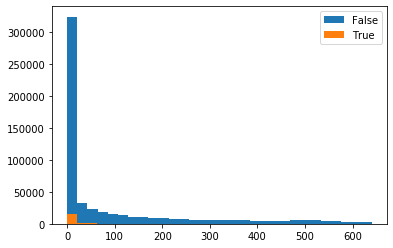

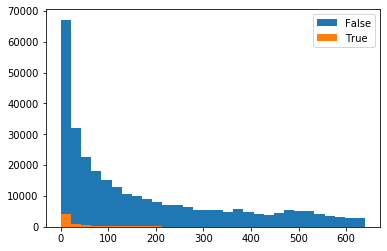

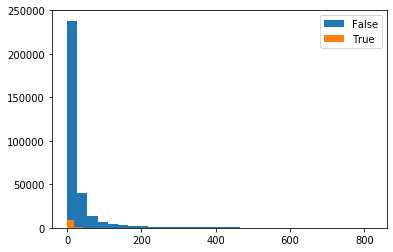

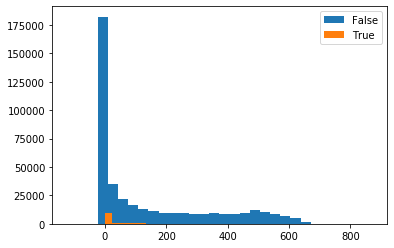

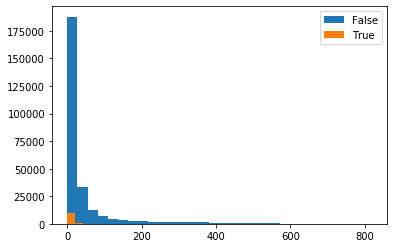

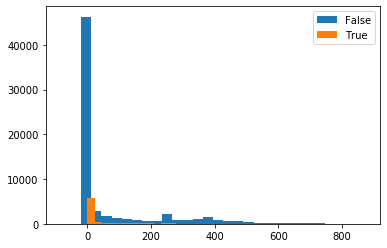

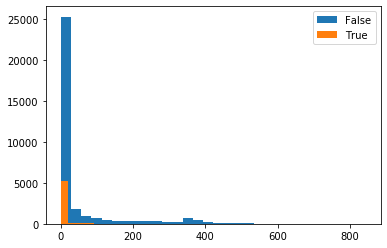

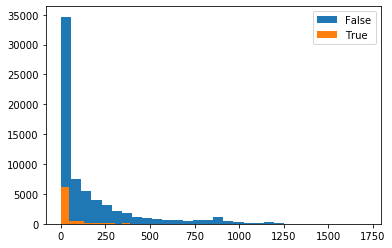

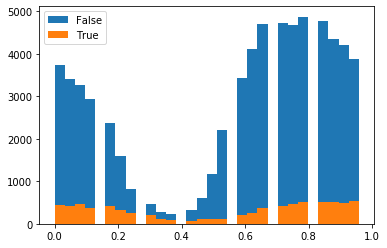

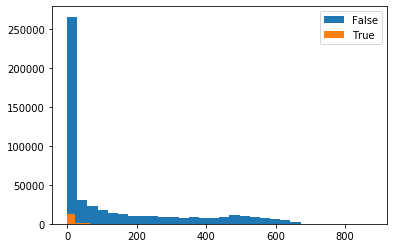

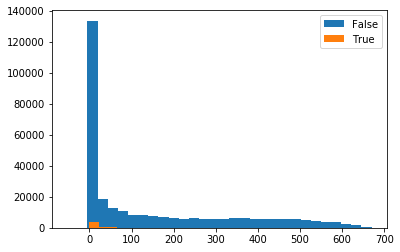

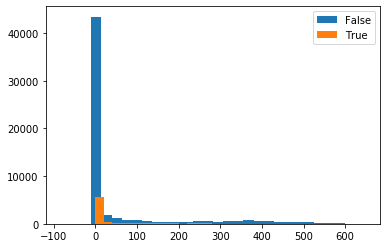

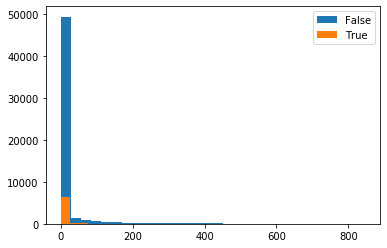

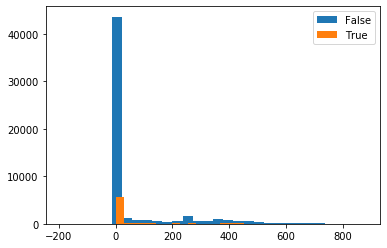

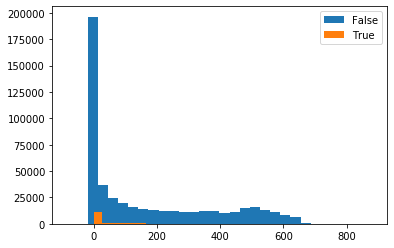

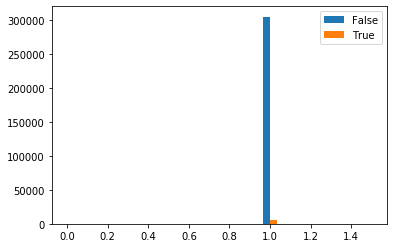

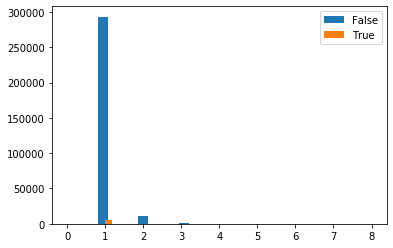

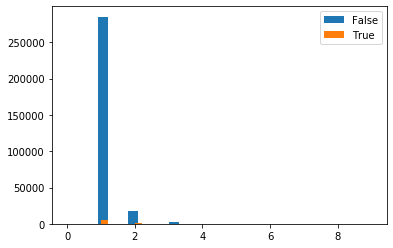

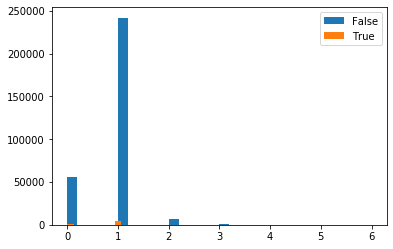

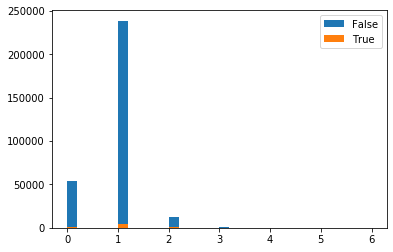

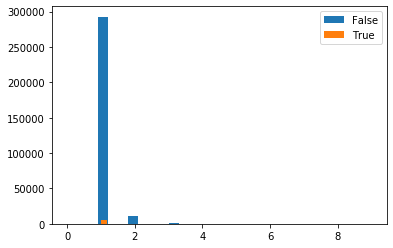

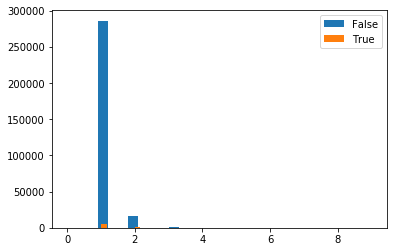

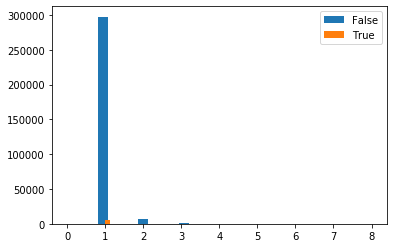

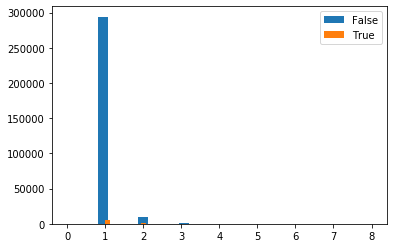

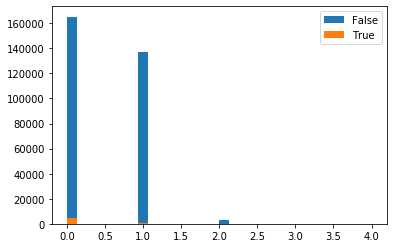

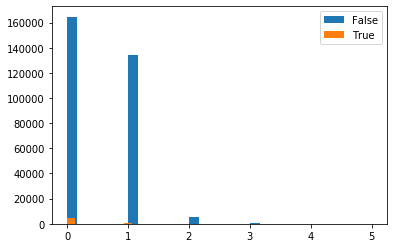

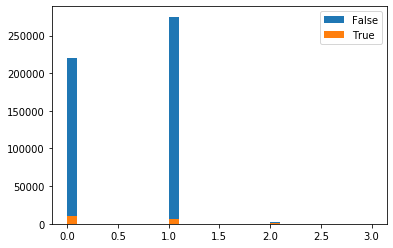

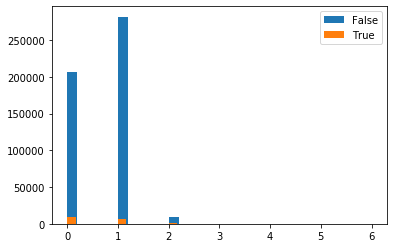

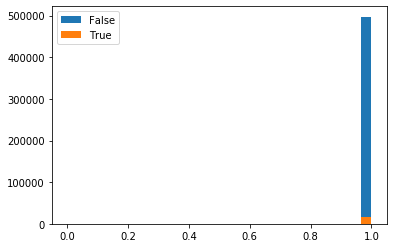

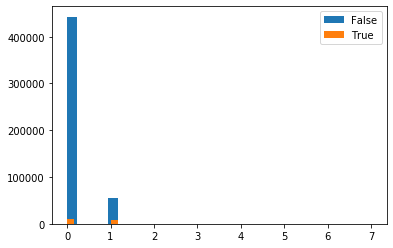

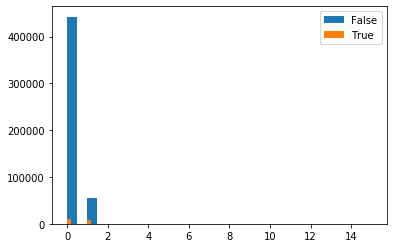

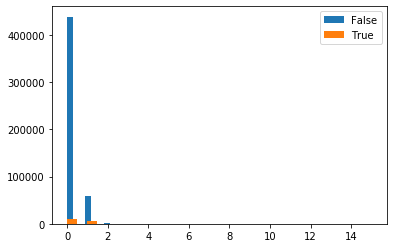

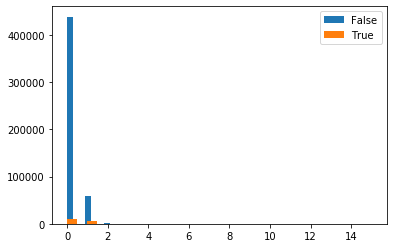

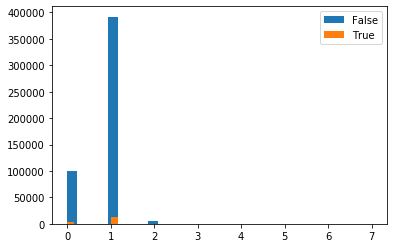

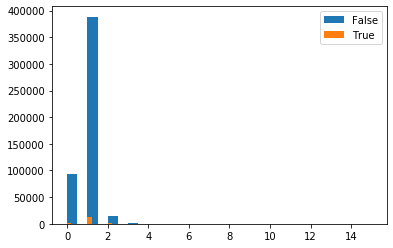

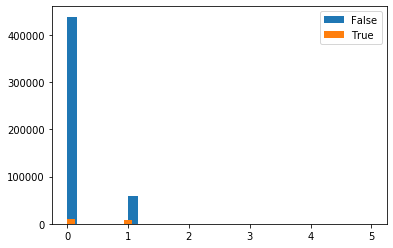

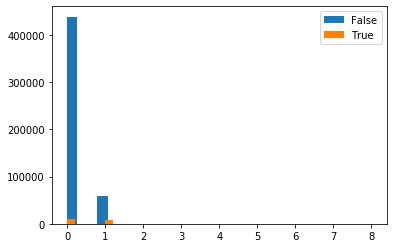

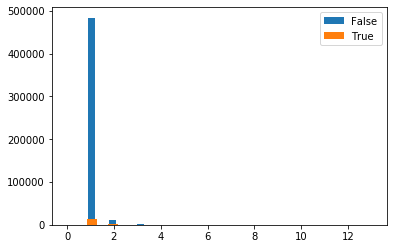

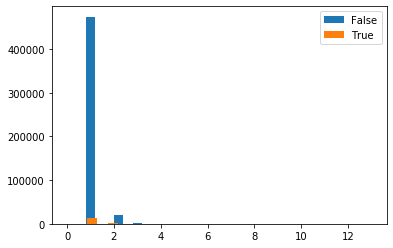

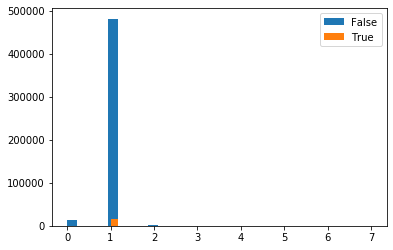

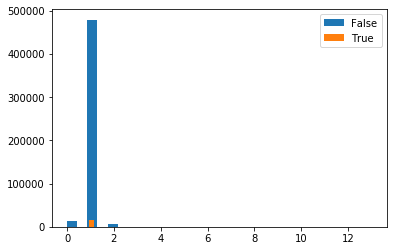

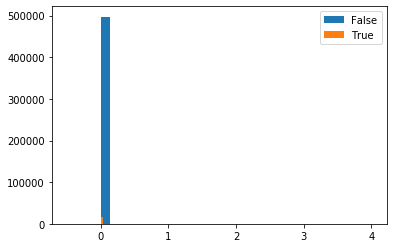

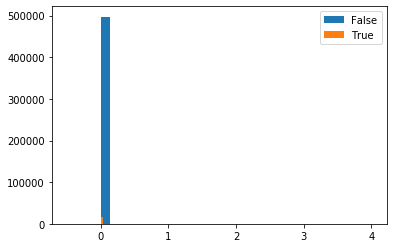

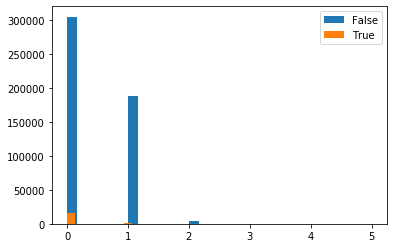

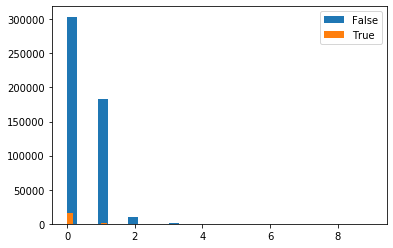

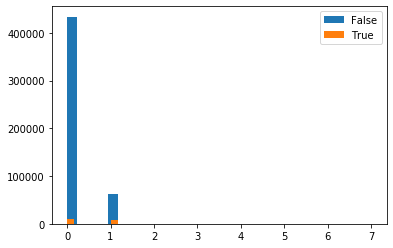

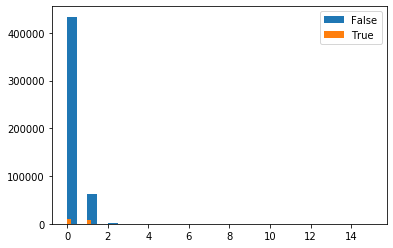

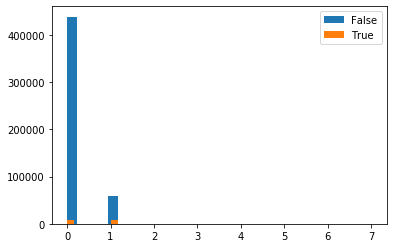

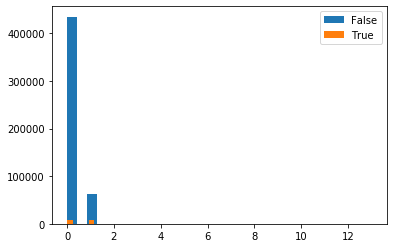

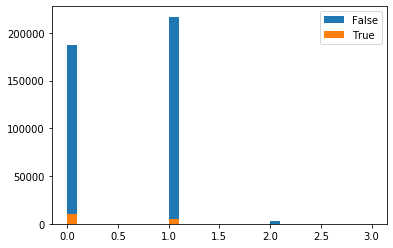

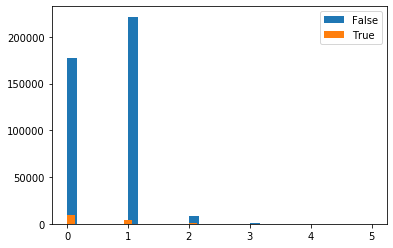

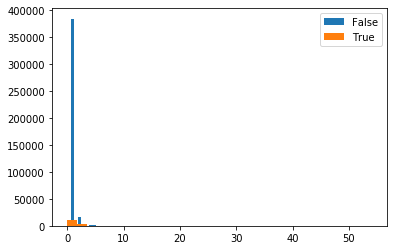

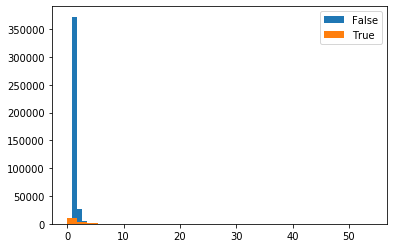

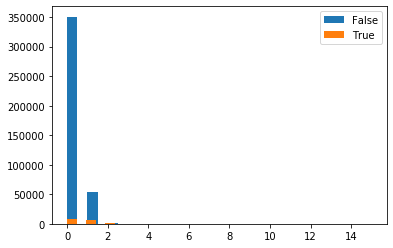

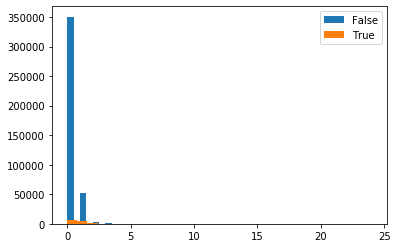

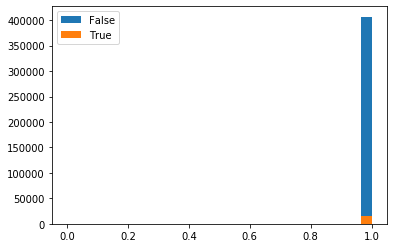

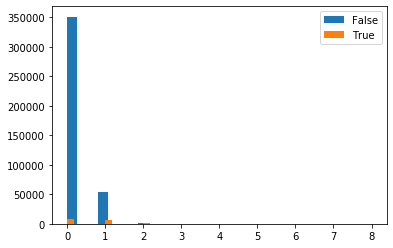

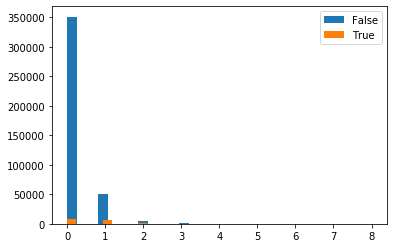

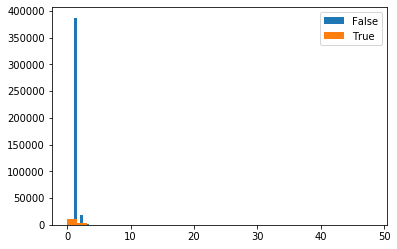

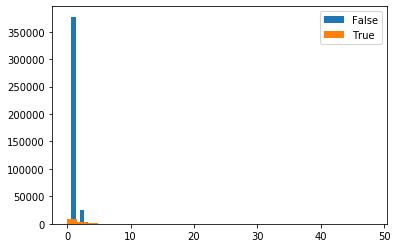

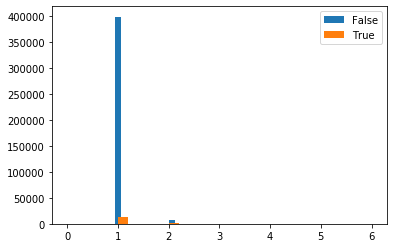

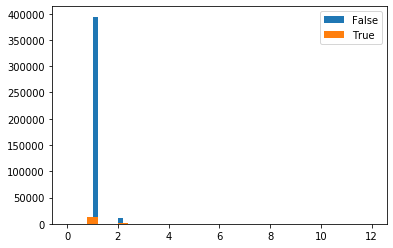

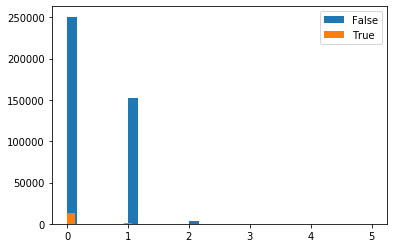

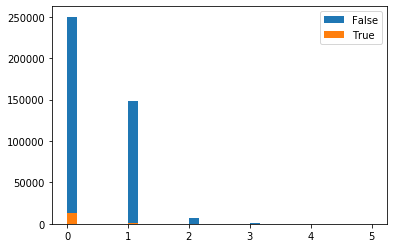

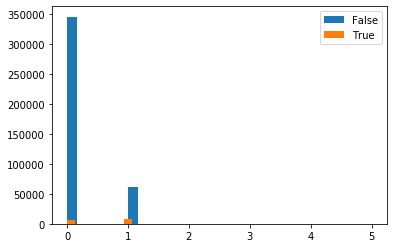

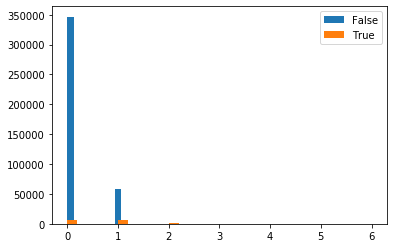

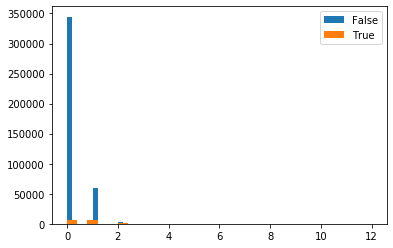

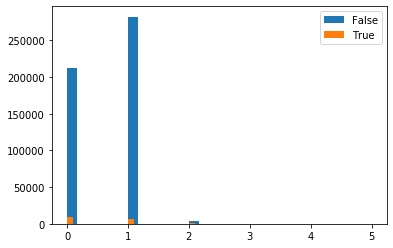

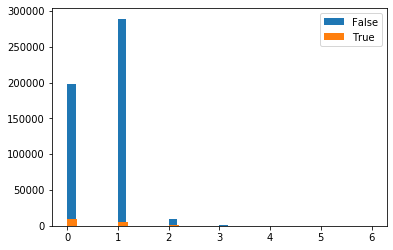

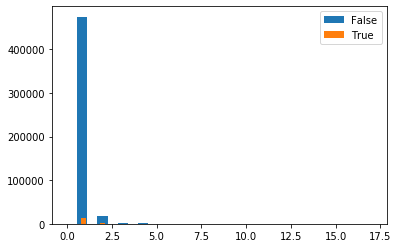

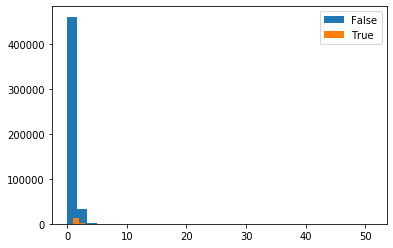

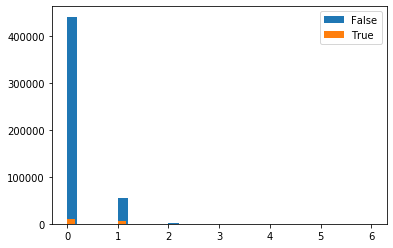

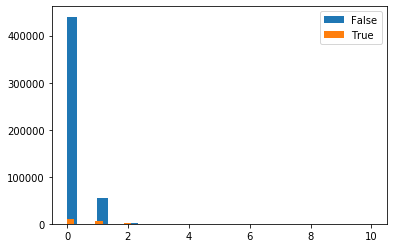

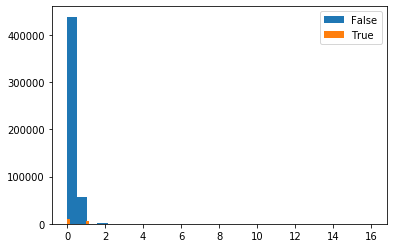

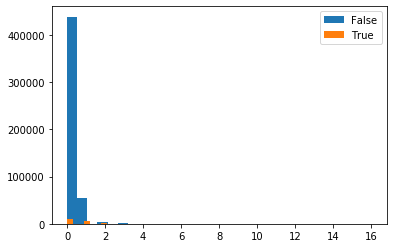

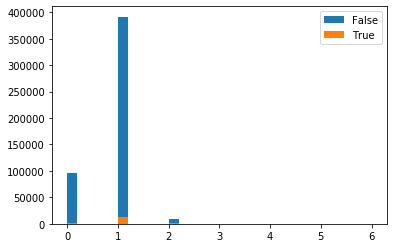

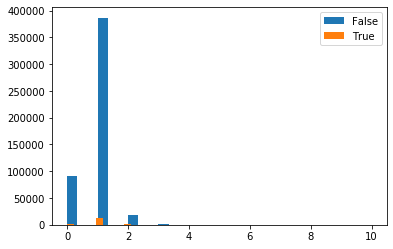

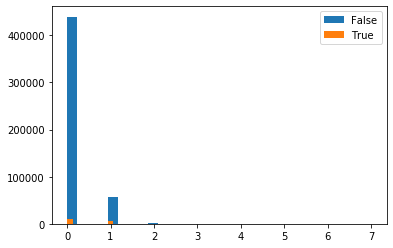

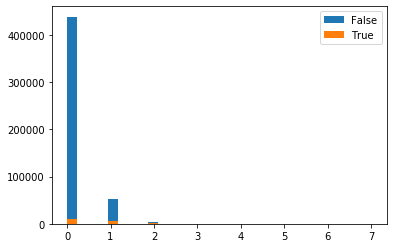

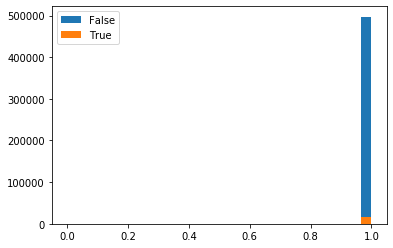

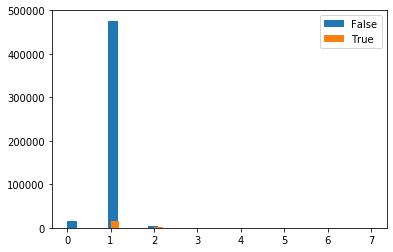

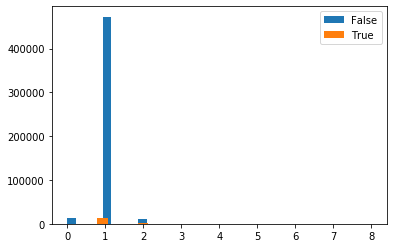

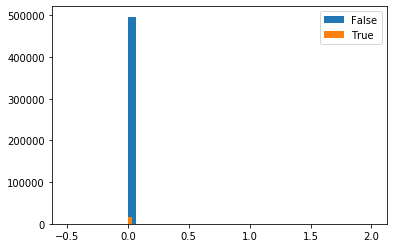

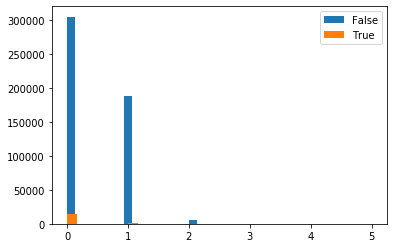

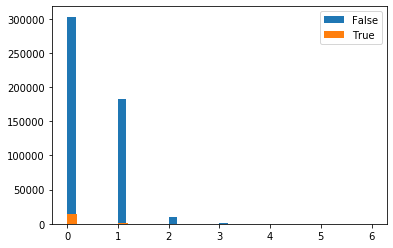

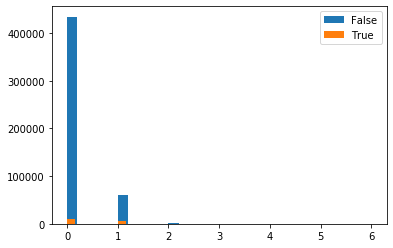

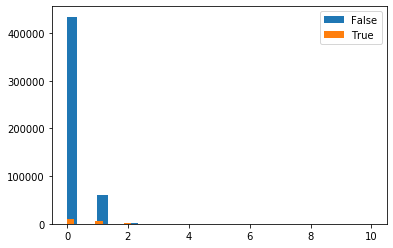

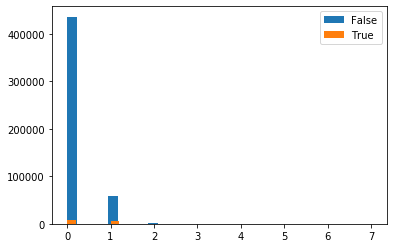

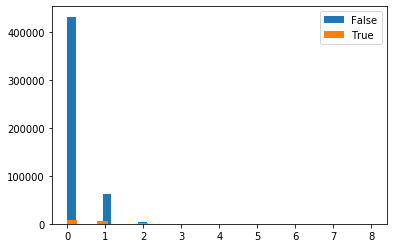

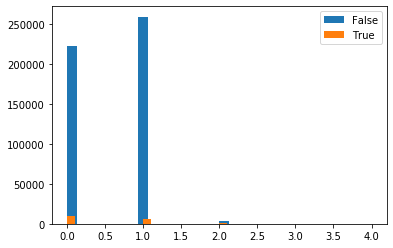

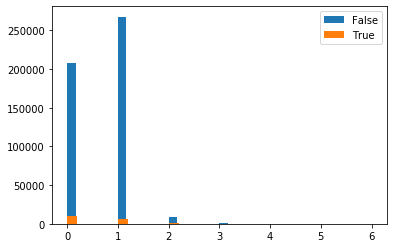

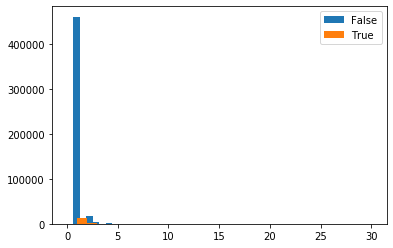

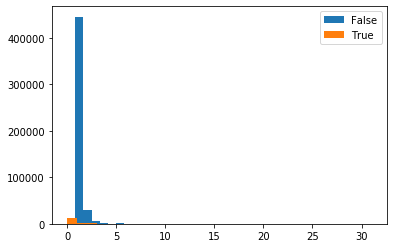

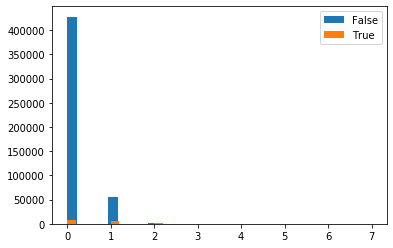

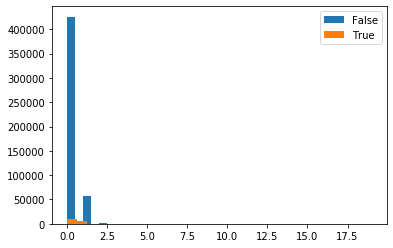

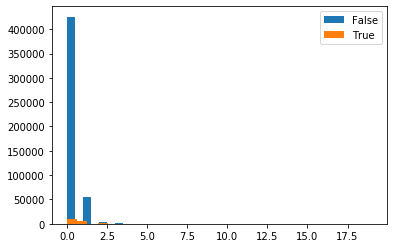

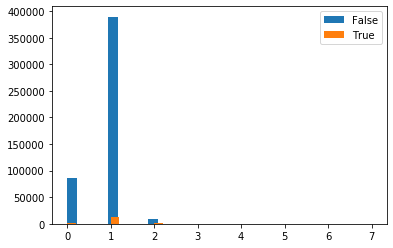

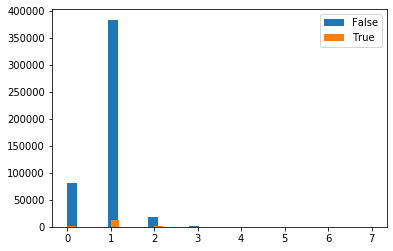

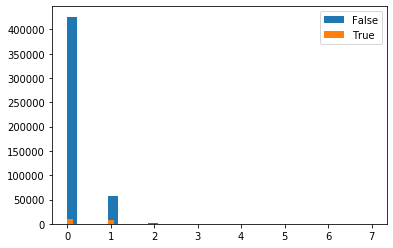

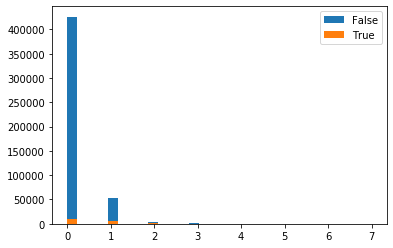

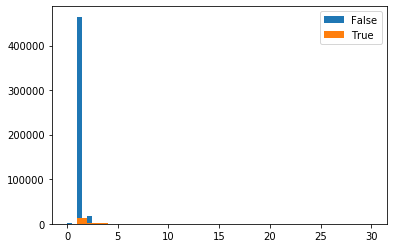

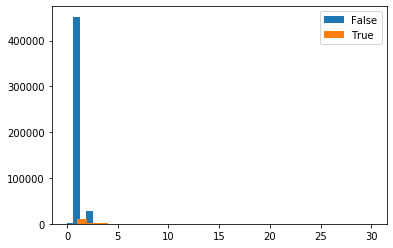

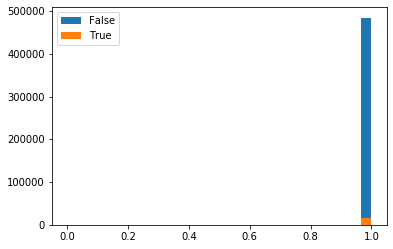

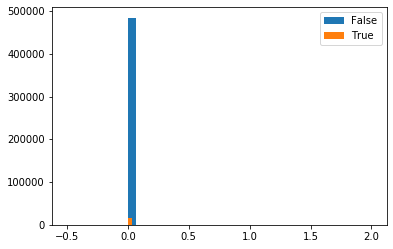

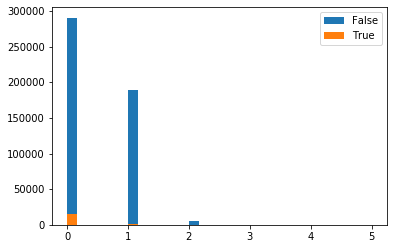

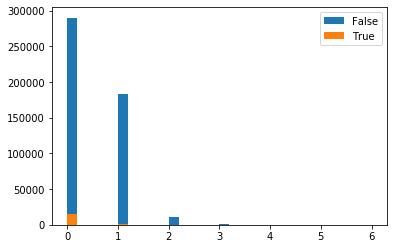

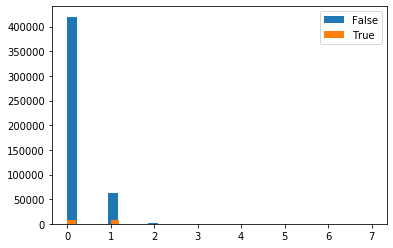

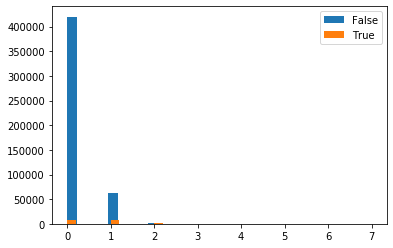

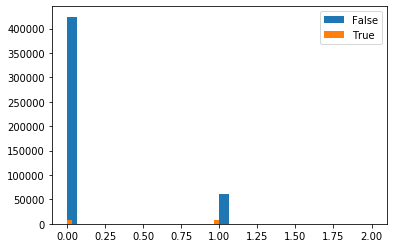

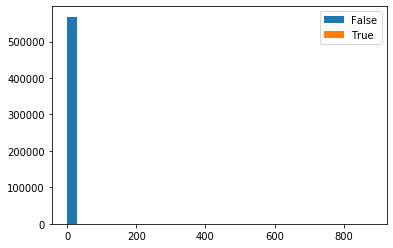

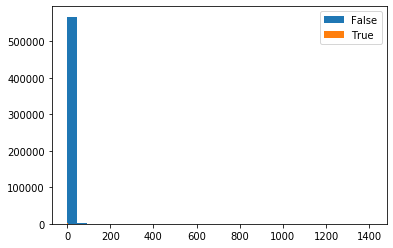

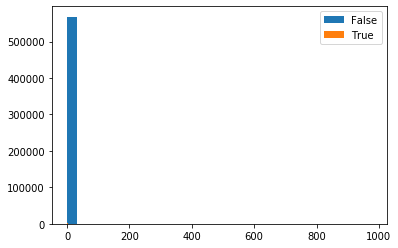

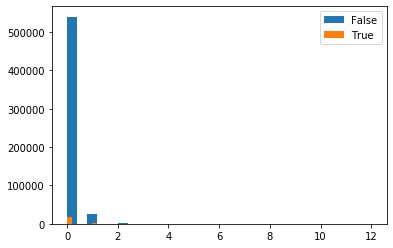

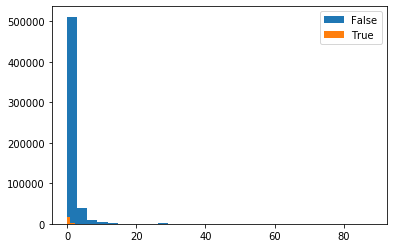

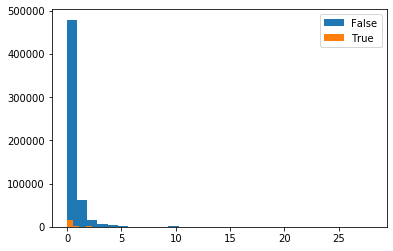

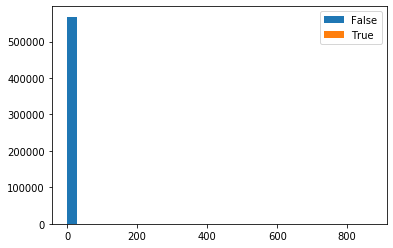

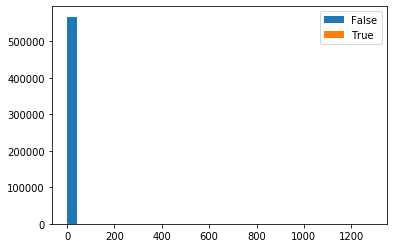

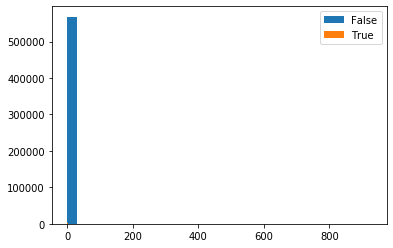

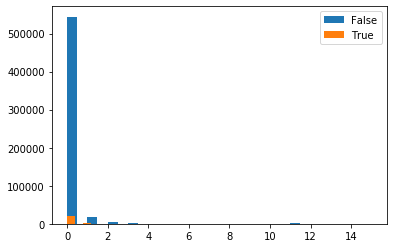

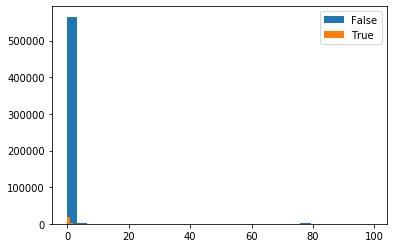

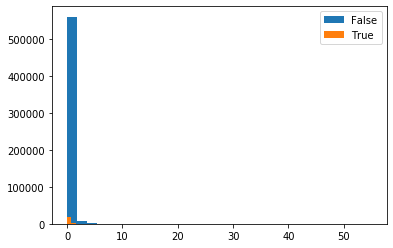

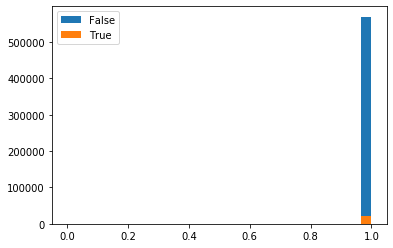

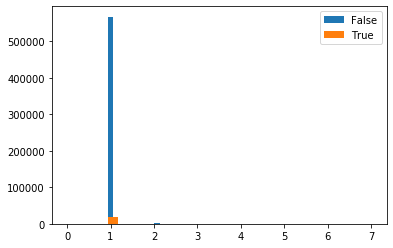

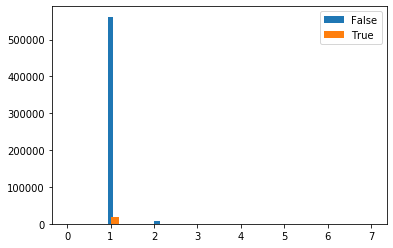

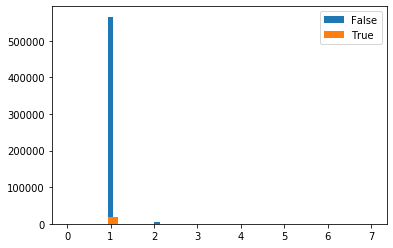

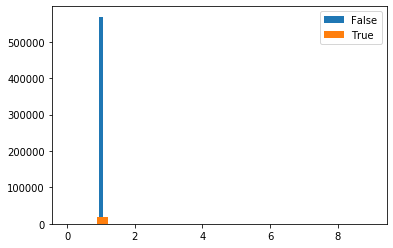

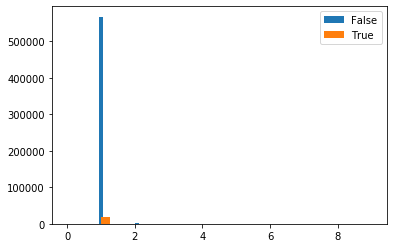

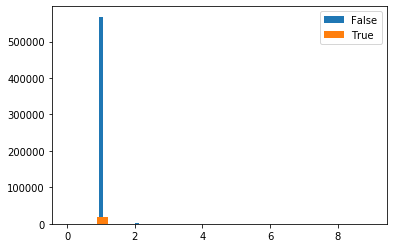

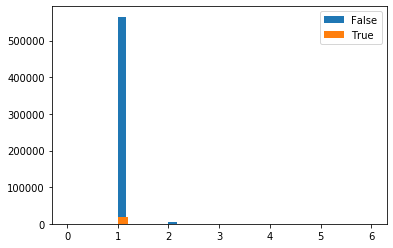

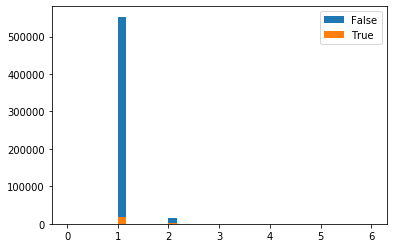

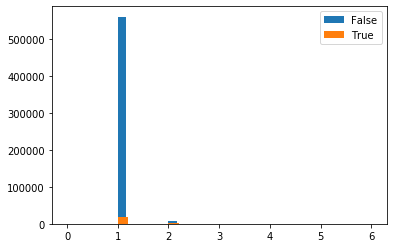

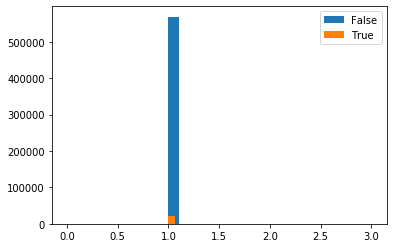

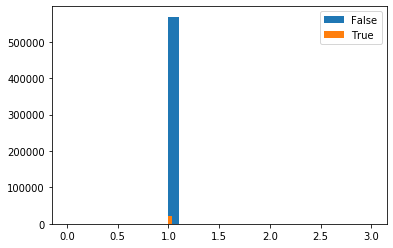

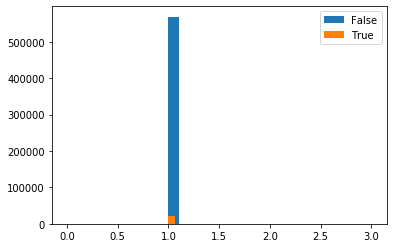

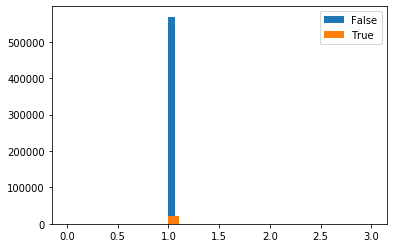

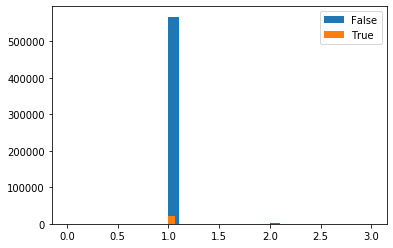

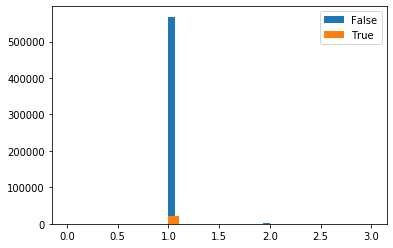

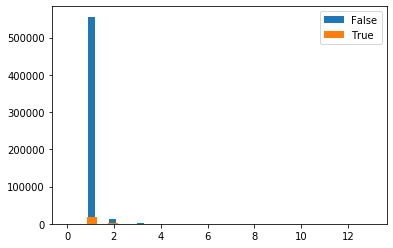

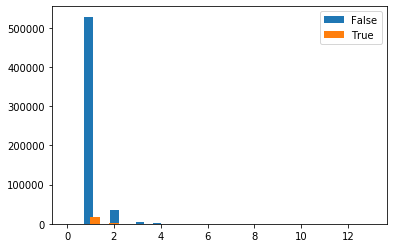

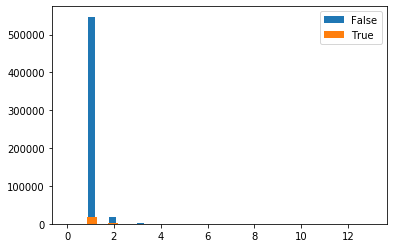

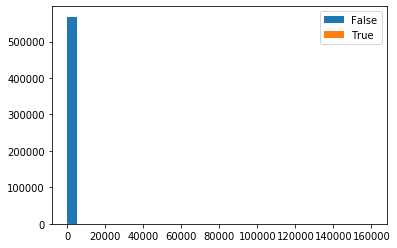

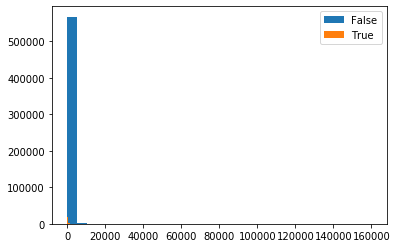

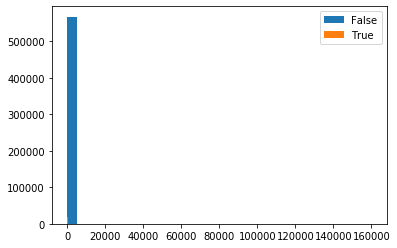

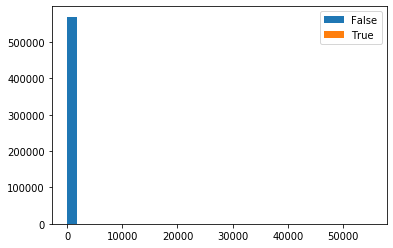

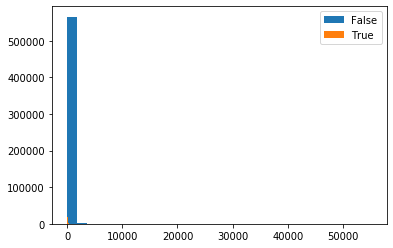

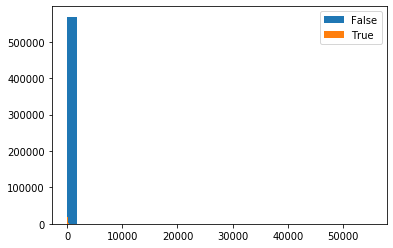

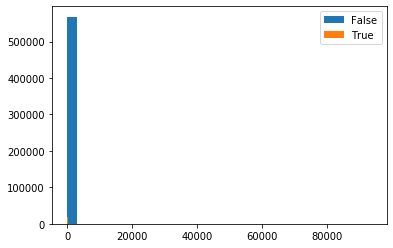

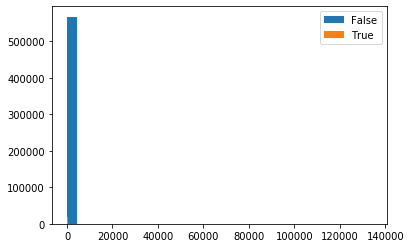

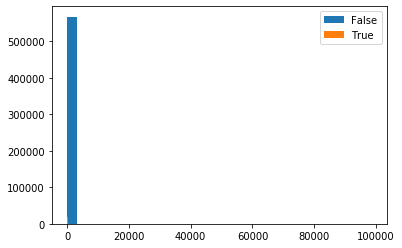

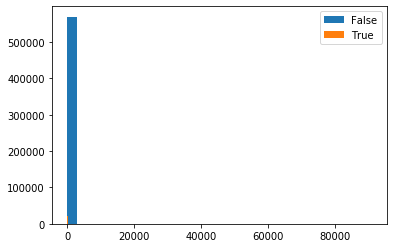

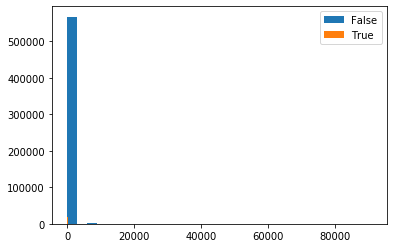

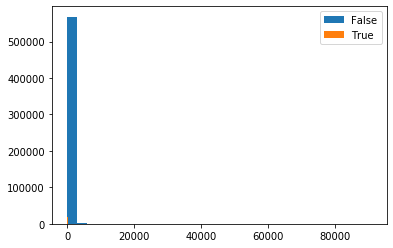

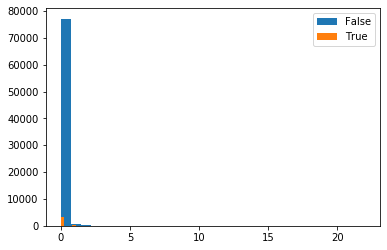

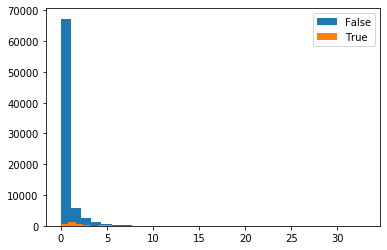

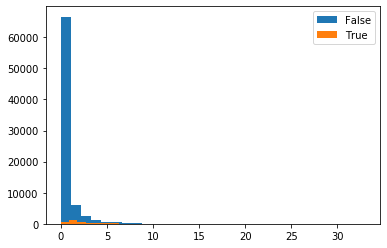

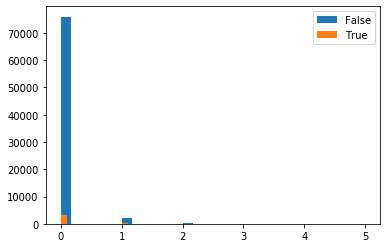

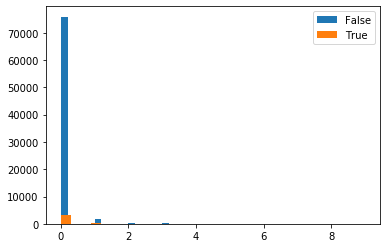

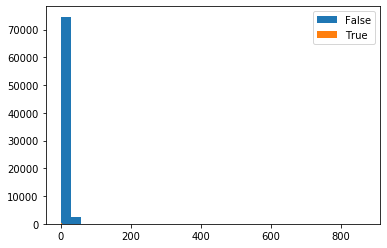

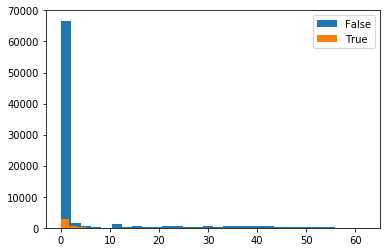

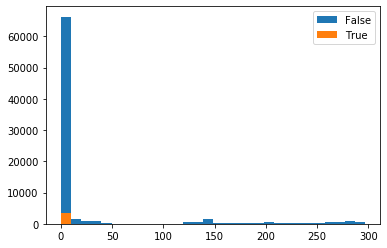

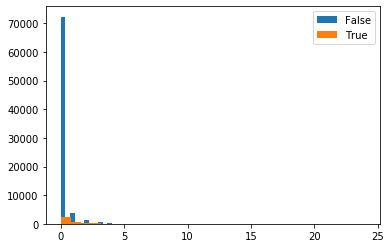

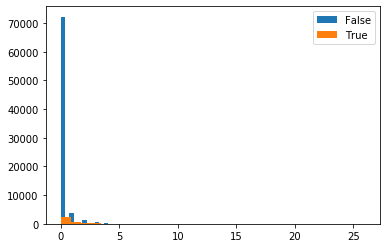

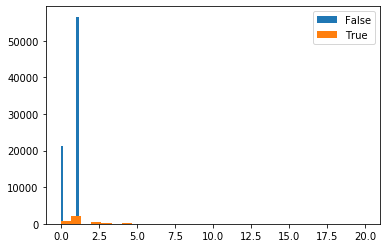

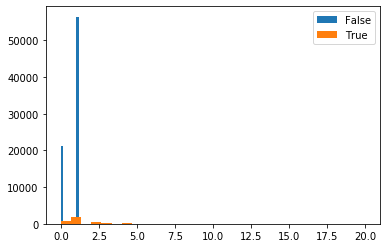

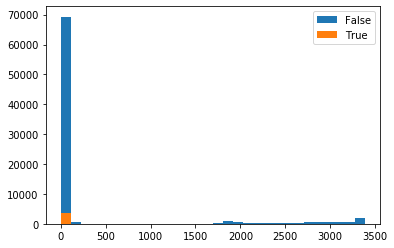

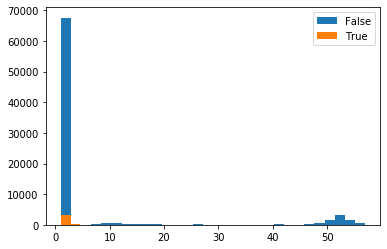

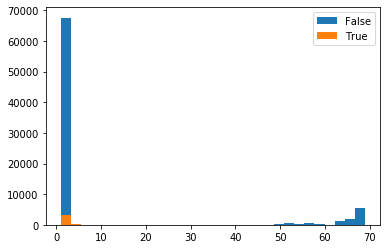

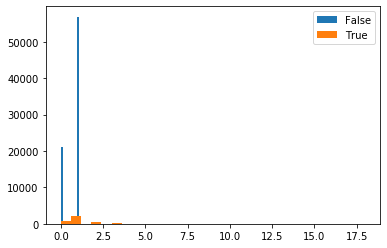

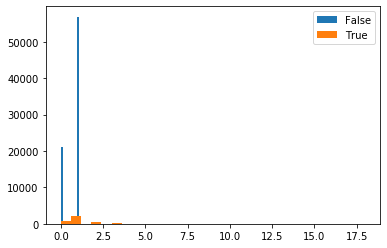

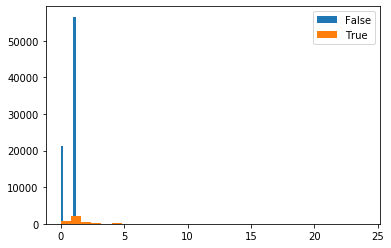

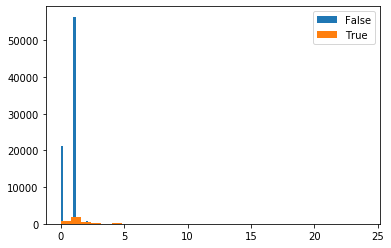

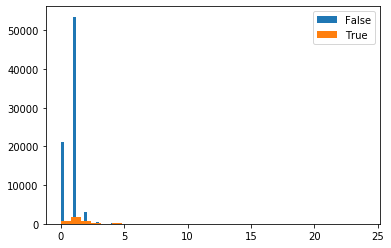

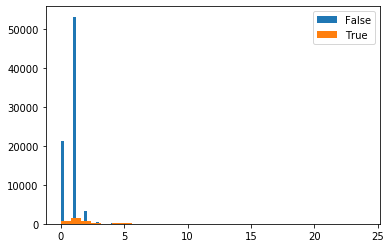

KeyboardInterrupt: 

In [87]:
def numerical_plot(df):
    for col in df.columns:
        if col == 'isFraud':
            continue
        df_false = df.query('isFraud==0')
        df_true = df.query('isFraud==1')
        plt.hist(df_false[col], bins=30, label='False')
        plt.hist(df_true[col], bins=30, label='True')
        plt.legend()
        plt.show()

numerical_plot(train.select_dtypes(include=['int', 'float']))

# Categorical Plot

In [89]:
def categorical_plot(df):
    for col in df.columns:
        if col == 'isFraud':
            continue
        sns.countplot(x=col, hue='isFraud', data=df)
        plt.show()
        
categorical_plot(train.select_dtypes(include=['object', 'int']))

KeyboardInterrupt: 

# Preprocessing

## Rename Device

In [13]:
def rename_device(x):
    for name in device_names:
        if name in str(x):
            x = name
    return x

device_names = ['Android', 'iOS', 'Mac', 'Windows', 'Linux', 'func']
train['device'] = train['id_30'].map(rename_device)
train = train.drop(columns='id_30')
test['device'] = test['id_30'].map(rename_device)
test = test.drop(columns='id_30')

## Rename Browser

In [14]:
def rename_browser(x):
    for name in browser_names:
        if name in str(x):
            x = name
    if x == 'Samsung':
        x = 'samsung'
    elif x == 'Firefox':
        x = 'firefox'
    return x

browser_names = [
    'samsung', 'Samsung', 'safari', 'chrome', 'edge', 'firefox', 'Firefox',
    'ie', 'webview', 'Generic', 'opera','android', 'google',
]
train['browser'] = train['id_31'].map(lambda x: rename_browser(x))
train = train.drop(columns='id_31')
test['browser'] = test['id_31'].map(lambda x: rename_browser(x))
test = test.drop(columns='id_31')

## Split Pixel Column

In [15]:
train[['pix_row', 'pix_col']] = train['id_33'].str.split('x', expand=True)
train = train.drop(columns='id_33')
test[['pix_row', 'pix_col']] = test['id_33'].str.split('x', expand=True)
test = test.drop(columns='id_33')

## Drop Unused Column

In [16]:
train = train.drop(columns='DeviceInfo')
test = test.drop(columns='DeviceInfo')

# Rename Email Domain

In [17]:
train["P_emaildomain"] = train["P_emaildomain"].fillna('null.com').map(lambda x: x.split('.')[0])
train["R_emaildomain"] = train["R_emaildomain"].fillna('null.com').map(lambda x: x.split('.')[0])
test["P_emaildomain"] = test["P_emaildomain"].fillna('null.com').map(lambda x: x.split('.')[0])
test["R_emaildomain"] = test["R_emaildomain"].fillna('null.com').map(lambda x: x.split('.')[0])

In [18]:
train.query('R_emaildomain!="null" and P_emaildomain!=R_emaildomain')[['P_emaildomain', 'R_emaildomain', 'isFraud']]

,P_emaildomain,R_emaildomain,isFraud
TransactionID,,,
2987038,null,gmail,0
2987069,null,hotmail,0
2987197,aol,gmail,0
2987236,yahoo,gmail,0
2987271,comcast,yahoo,0
2987281,null,aol,0
2987332,gmail,anonymous,0
2987335,gmail,anonymous,0
2987336,gmail,anonymous,0


In [24]:
train.shape

(590540, 433)

In [25]:
test.shape

(506691, 432)

In [201]:
for col in train.select_dtypes('object').columns:
    print(col)
    print(train[col].unique())
    print(train[col].nunique())

ProductCD
['W' 'H' 'C' 'S' 'R']
5
card4
['discover' 'mastercard' 'visa' 'american express' nan]
4
card6
['credit' 'debit' nan 'debit or credit' 'charge card']
4
P_emaildomain
['null' 'gmail' 'outlook' 'yahoo' 'mail' 'anonymous' 'hotmail' 'verizon'
 'aol' 'me' 'comcast' 'optonline' 'cox' 'charter' 'rocketmail' 'prodigy'
 'embarqmail' 'icloud' 'live' 'att' 'juno' 'ymail' 'sbcglobal' 'bellsouth'
 'msn' 'q' 'centurylink' 'servicios-ta' 'earthlink' 'cfl' 'roadrunner'
 'netzero' 'gmx' 'suddenlink' 'frontiernet' 'windstream' 'frontier' 'mac'
 'aim' 'web' 'twc' 'cableone' 'sc' 'ptd' 'protonmail']
45
R_emaildomain
['null' 'gmail' 'hotmail' 'outlook' 'anonymous' 'charter' 'prodigy'
 'comcast' 'live' 'icloud' 'yahoo' 'aol' 'juno' 'att' 'verizon'
 'bellsouth' 'servicios-ta' 'ymail' 'msn' 'optonline' 'gmx' 'aim' 'mail'
 'me' 'cox' 'earthlink' 'embarqmail' 'web' 'sbcglobal' 'scranton' 'mac'
 'twc' 'roadrunner' 'frontiernet' 'q' 'windstream' 'suddenlink' 'ptd'
 'frontier' 'cfl' 'netzero' 'rocketmail'

In [172]:
for col in test.select_dtypes('object').columns:
    print(col)
    print(test[col].unique())
    print(test[col].nunique())

id_12
['NotFound' 'Found']
2
id_15
['New' 'Found' 'Unknown' nan]
3
id_16
['NotFound' 'Found' nan]
2
id_23
[nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']
3
id_27
[nan 'Found' 'NotFound']
2
id_28
['New' 'Found' nan]
2
id_29
['NotFound' 'Found' nan]
2
id_34
[nan 'match_status:2' 'match_status:1']
2
id_35
['F' 'T' nan]
2
id_36
['F' 'T' nan]
2
id_37
['T' 'F' nan]
2
id_38
['F' 'T' nan]
2
DeviceType
['mobile' 'desktop' nan]
2
browser
['chrome' 'ie' 'safari' 'edge' nan 'firefox' 'samsung' 'google' 'other'
 'opera' 'android' 'facebook' 'mobile' 'rim' 'palemoon' 'uc' 'blackberry']
16
pix_row
[nan '1280' '2208' '2048' '1366' '1334' '1440' '2732' '1920' '2880' '1024'
 '1365' '2560' '2001' '1680' '2220' '2400' '2047' '2436' '1600' '1921'
 '3360' '2736' '2049' '1919' '5120' '1136' '3000' '1502' '1679' '3839'
 '1480' '1152' '855' '2224' '1360' '1536' '1599' '3840' '1727' '2094'
 '2562' '1800' '1364' '2160' '993' '1400' '2960' '2256' '1279' '1622'
 '1368' '4096' '3440' '2961' '360

In [19]:
def distplot_for_labeling(a, bins, ymax):
    plt.figure(figsize=(7, 5))
    sns.distplot(a, bins=bins)
    plt.title(a.name)
    plt.ylim(0, ymax)
    plt.show()

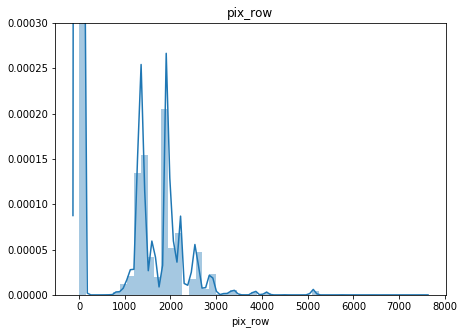

In [20]:
distplot_for_labeling(train["pix_row"].fillna(0).astype('int'), bins=50, ymax=0.0003)

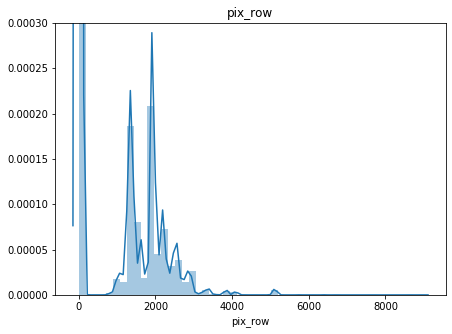

In [22]:
distplot_for_labeling(test["pix_row"].fillna(0).astype('int'), bins=50, ymax=0.0003)

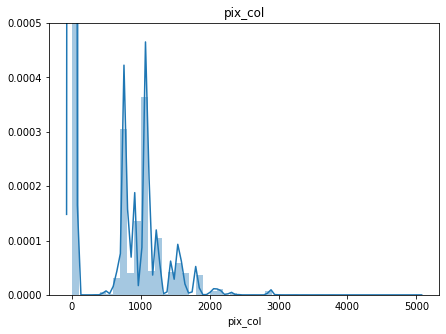

In [21]:
distplot_for_labeling(train["pix_col"].fillna(0).astype('int'), bins=50, ymax=0.0005)

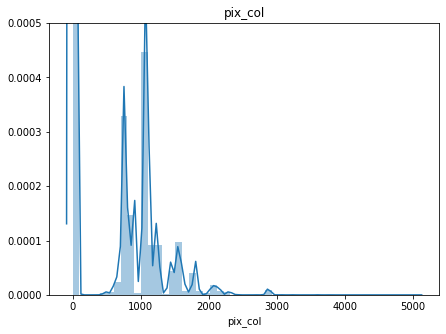

In [23]:
distplot_for_labeling(test["pix_col"].fillna(0).astype('int'), bins=50, ymax=0.0005)